# 엑셀 데이터를 DF로 정리하기

In [1]:
import pandas as pd

In [3]:
# read_excel
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\졸업생의 진로 현황(전체).xlsx'

raw_df = pd.read_excel( path, sheet_name=0 )

In [5]:
# 컬럼파트
# 1) 사용할 컬럼 추리기

raw_df.columns

use_cols = ['지역', '정보공시 \n 학교코드', '학교명', '졸업자.2',
            '(특수목적고)과학고 진학자.2', '(특수목적고)외고ㆍ국제고 진학자.2']

In [7]:
# 컬럼을 동시에 여러개 선택
# => 리스트로 묶어서 입력

raw_df2 = raw_df[ use_cols ]

In [9]:
# 컬럼파트
# 2) 컬럼명을 사용하기 좋게 바꾸기
# 순서에 맞게 작성하면 한번에 변경할 수 있다.

raw_df2.columns = ['local', 'code', 'sch_name', 'grad_N', 'sci_N', 'fI_N']

In [15]:
# 컬럼의 찌꺼기 삭제

raw_df3 = raw_df2.drop(0)

In [14]:
# 인덱스 파트
# drop 하다보면 인덱스 번호가 빠진 게 생기게 된다. 
# 인덱스 리셋

# raw_df3.reset_index()

,index,local,code,sch_name,grad_N,sci_N,fI_N
0,1,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,234,4,5
1,2,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,172,0,8
2,3,서울특별시 강남구,S010000698,개원중학교,214,2,9
3,4,서울특별시 서초구,S010000700,경원중학교,310,5,4
4,5,서울특별시 강남구,S010000701,구룡중학교,256,3,4
...,...,...,...,...,...,...,...
3453,3454,제주특별자치도 제주시,S170000844,탐라중학교,298,1,1
3454,3455,제주특별자치도 제주시,S170000512,제주영지학교,12,0,0
3455,3456,제주특별자치도 제주시,S170000513,제주영송학교,21,0,0
3456,3457,제주특별자치도 서귀포시,S170000790,서귀포온성학교,9,0,0


In [22]:
# 데이터 값 파트
# 1) 결측 데이터 체크
# 빠져있는 데이터
# isna => 모든 데이터에 조건을 걸어버림 : NaN인지 아닌지
#                                        => NAN : True, else : False

raw_df3.isna().sum()

local        2
code         0
sch_name     0
grad_N      34
sci_N       34
fI_N        34
dtype: int64

In [27]:
raw_df3.isna().sum() / len(raw_df3)

local       0.000578
code        0.000000
sch_name    0.000000
grad_N      0.009832
sci_N       0.009832
fI_N        0.009832
dtype: float64

In [31]:
# 필터링을 이용해서 빠져있는 데이터 가져와보기

raw_df3[ raw_df3['local'].isna() ]

,local,code,sch_name,grad_N,sci_N,fI_N
588,NaN,S020002009,신정중학교,317,1,5
3011,NaN,S150002889,은풍중학교,15,0,0


In [32]:
raw_df3[ raw_df3['grad_N'].isna() ]

,local,code,sch_name,grad_N,sci_N,fI_N
388,서울특별시 송파구,S010000663,광성하늘빛학교,NaN,NaN,NaN
389,서울특별시 동작구,S010000664,누리학교,NaN,NaN,NaN
404,서울특별시 종로구,S010000684,수도사랑의학교,NaN,NaN,NaN
599,부산광역시 사하구,S020000581,부산천사의학교,NaN,NaN,NaN
606,부산광역시 연제구,S020001876,부산두레학교,NaN,NaN,NaN
726,대구광역시 동구,S030001863,새론중학교,NaN,NaN,NaN
731,대구광역시 달성군,S030002074,유가중학교,NaN,NaN,NaN
733,대구광역시 달성군,S030002106,한울안중학교,NaN,NaN,NaN
734,대구광역시 달성군,S030002111,서동중학교,NaN,NaN,NaN
745,대구광역시 달서구,S030002110,대구해올중·고등학교,NaN,NaN,NaN


In [34]:
# 결측값이 있는 데이터를 다 날려서 해결

raw_df4 = raw_df3.dropna()

In [35]:
raw_df4.isna().sum()

local       0
code        0
sch_name    0
grad_N      0
sci_N       0
fI_N        0
dtype: int64

In [41]:
# 데이터 값 파트
# 2) 데이터 타입 체크
# 컬럼별 데이터 타입을 체크
# int64, float64, datetime, ..., object

raw_df4.dtypes

local       object
code        object
sch_name    object
grad_N      object
sci_N       object
fI_N        object
dtype: object

In [44]:
# 하나의 Series 로 변경할 수 있는 함수

raw_df4['grad_N'] = pd.to_numeric( raw_df4['grad_N'] )
raw_df4['sci_N'] = pd.to_numeric( raw_df4['sci_N'] )
raw_df4['fI_N'] = pd.to_numeric( raw_df4['fI_N'] )

# 경고 나오는 이유
# raw_df3 와 raw_df4 를 만들때 공유되어있는 부분을 서로 바라보며 사용하고 있기 때문에 
# raw_df4 를 덮어 씌우면 raw_df3 에서도 변경된 부분으로 확인될 수 있다. 
# raw_4 만들때 .copy() 를 이용하면 메모리에 아예 새롭게 복사를 한다. 
# 공통된 부분을 함께 참조, 달라지는 부분에 대해서만 새롭게 메모리 할당 하기 때문에 발생하는 경고

C:\Users\cypark\AppData\Local\Temp/ipykernel_10136/2065679423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df4['grad_N'] = pd.to_numeric( raw_df4['grad_N'] )
C:\Users\cypark\AppData\Local\Temp/ipykernel_10136/2065679423.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_df4['sci_N'] = pd.to_numeric( raw_df4['sci_N'] )
C:\Users\cypark\AppData\Local\Temp/ipykernel_10136/2065679423.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [45]:
raw_df4.dtypes

local       object
code        object
sch_name    object
grad_N       int64
sci_N        int64
fI_N         int64
dtype: object

In [48]:
raw_df5 = raw_df4.reset_index(drop=True)

In [49]:
def get_gradDf(path):
    raw_df = pd.read_excel( path, sheet_name=0 )

    use_cols = ['지역', '정보공시 \n 학교코드', '학교명', '졸업자.2',
                '(특수목적고)과학고 진학자.2', '(특수목적고)외고ㆍ국제고 진학자.2']

    raw_df2 = raw_df[ use_cols ]
    raw_df2.columns = ['local', 'code', 'sch_name', 'grad_N', 'sci_N', 'fI_N']
    raw_df3 = raw_df2.drop(0)

    raw_df4 = raw_df3.dropna().copy()
    raw_df4['grad_N'] = pd.to_numeric( raw_df4['grad_N'] )
    raw_df4['sci_N'] = pd.to_numeric( raw_df4['sci_N'] )
    raw_df4['fI_N'] = pd.to_numeric( raw_df4['fI_N'] )

    raw_df5 = raw_df4.reset_index(drop=True)
    
    return raw_df5

In [51]:
import python_data_study as pds

grade_df = pds.get_gradDf(path)

# DF의 주요 기능 연습

In [53]:
# 시리즈의 연산
# 같은 DF에서 시리즈를 가지고 왔음 => 인덱스가 자동으로 잘 맞음
# 기존에 속성들을 활용해서 새로운 속성을 생성함

grade_df['spc_N'] = grade_df['sci_N'] + grade_df['fI_N']

In [59]:
grade_df['spc_R'] = (grade_df['spc_N'] / grade_df['grad_N'] * 100).round(2)

In [69]:
# 특목고 진학률이 높은 학교 top20

grade_df.sort_values('spc_R', ascending=False).head(20) # or[:20]

,local,code,sch_name,grad_N,sci_N,fI_N,spc_N,spc_R
1819,경기도 고양시 덕양구,S090005829,티엘비유글로벌학교(중),10,0,7,7,70.00
1664,경기도 가평군,S090005419,청심국제중학교,100,0,48,48,48.00
474,부산광역시 부산진구,S020000969,부산국제중학교,23,6,5,11,47.83
2361,전라북도 군산시,S130000563,선유도중학교,3,0,1,1,33.33
292,서울특별시 광진구,S010002151,대원국제중학교,164,5,32,37,22.56
2232,충청남도 청양군,S120000822,동영중학교,5,0,1,1,20.00
319,서울특별시 강북구,S010002279,영훈국제중학교,158,7,23,30,18.99
2591,전라남도 구례군,S140000636,구례북중학교,11,1,1,2,18.18
2344,전라북도 고창군,S130000475,심원중학교,6,1,0,1,16.67
2009,충청북도 괴산군,S110000274,청천중학교,12,0,2,2,16.67


In [70]:
# 졸업생 숫자가 100이상인 학교에서 특목고 진학률이 높은 학교 top 20

grade_df[ grade_df['grad_N'] >= 100 ].sort_values('spc_R', ascending=False).head(20)

,local,code,sch_name,grad_N,sci_N,fI_N,spc_N,spc_R
1664,경기도 가평군,S090005419,청심국제중학교,100,0,48,48,48.00
292,서울특별시 광진구,S010002151,대원국제중학교,164,5,32,37,22.56
319,서울특별시 강북구,S010002279,영훈국제중학교,158,7,23,30,18.99
1377,경기도 안산시 상록구,S090002694,성안중학교,309,32,4,36,11.65
3345,경상남도 창원시 성산구,S160003406,삼정자중학교,251,14,15,29,11.55
583,부산광역시 남구,S020002007,오륙도중학교,151,3,13,16,10.60
577,부산광역시 해운대구,S020001893,해강중학교,350,7,29,36,10.29
11,서울특별시 강남구,S010000709,도곡중학교,229,11,12,23,10.04
1012,대전광역시 유성구,S060000450,대덕중학교,193,7,12,19,9.84
1407,경기도 과천시,S090003014,과천문원중학교,387,3,35,38,9.82


# 시리즈의 연산, 필터링, apply, groupby, pivot

In [76]:
# apply
# 똑같은 코드를 시리즈의 모든 데이터에게 똑같이 apply

grade_df.loc[0, 'local'].split(' ')[0]

'서울특별시'

In [ ]:
temp_list = []

for val in grade_df['local']:
    temp_list.append(val.split(' ')[0])

In [77]:
def temp(x):
    return x.split(' ')[0]

grade_df['local'].apply( temp )

0         서울특별시
1         서울특별시
2         서울특별시
3         서울특별시
4         서울특별시
         ...   
3417    제주특별자치도
3418    제주특별자치도
3419    제주특별자치도
3420    제주특별자치도
3421    제주특별자치도
Name: local, Length: 3422, dtype: object

In [81]:
#lambda 익명함수

grade_df['sido'] = grade_df['local'].apply( lambda x : x.split(' ')[0] )

In [83]:
grade_df['gugun'] = grade_df['local'].apply( lambda x : x.split(' ')[1] )

In [85]:
grade_df['sido'].uniqueque()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [94]:
def short_sido(x):
    if len(x) == 4:
        return x[0] + x[2]
    else:
        return x[:2]

In [88]:
lambda x : x[0]+x[2] if len(x) == 4  else x[:2]

<function __main__.<lambda>(x)>

In [95]:
grade_df['sido'].apply( short_sido ).unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [90]:
grade_df['sido'].apply( lambda x : x[0]+x[2] if len(x) == 4  else x[:2] ).unique()

array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [ ]:
# groupby
# 특정 컬럼의 카테고리 기준으로 데이터를 묶어줌
# => 집합연산
# 특정 컬럼의 카테고리별로 데이터를 집계해서 볼 수 있음

In [98]:
grade_df['sido'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [101]:
grade_df.groupby('sido').sum()

,grad_N,sci_N,fI_N,spc_N,spc_R
sido,,,,,
강원도,14383,64,133,197,159.64
경기도,120572,361,2183,2544,1219.54
경상남도,31481,195,342,537,298.06
경상북도,22570,101,133,234,175.07
광주광역시,16369,70,84,154,80.00
대구광역시,22842,98,153,251,110.02
대전광역시,14988,100,261,361,187.25
부산광역시,26727,229,762,991,616.58
서울특별시,76687,535,1449,1984,927.91


In [103]:
temp = grade_df.groupby(['sido', 'gugun']).sum()

In [104]:
temp.index

MultiIndex([( '강원도', '강릉시'),
            ( '강원도', '고성군'),
            ( '강원도', '동해시'),
            ( '강원도', '삼척시'),
            ( '강원도', '속초시'),
            ( '강원도', '양구군'),
            ( '강원도', '양양군'),
            ( '강원도', '영월군'),
            ( '강원도', '원주시'),
            ( '강원도', '인제군'),
            ...
            ('충청북도', '단양군'),
            ('충청북도', '보은군'),
            ('충청북도', '영동군'),
            ('충청북도', '옥천군'),
            ('충청북도', '음성군'),
            ('충청북도', '제천시'),
            ('충청북도', '증평군'),
            ('충청북도', '진천군'),
            ('충청북도', '청주시'),
            ('충청북도', '충주시')],
           names=['sido', 'gugun'], length=229)

In [105]:
temp.reset_index()

,sido,gugun,grad_N,sci_N,fI_N,spc_N,spc_R
0,강원도,강릉시,2127,11,16,27,12.33
1,강원도,고성군,121,0,2,2,2.86
2,강원도,동해시,883,3,5,8,13.50
3,강원도,삼척시,549,0,3,3,1.95
4,강원도,속초시,884,1,12,13,6.28
...,...,...,...,...,...,...,...
224,충청북도,제천시,1195,1,0,1,0.56
225,충청북도,증평군,339,2,3,5,4.89
226,충청북도,진천군,646,0,1,1,0.47
227,충청북도,청주시,8475,41,187,228,126.43


# 지도 위에 시각화

In [106]:
import folium 

In [110]:
# [위도, 경로] 리스트로 묶어서 입력
# 도화지 => 이 지도 위에 데이터를 붙이자

korea_map = folium.Map( [36, 127], zoom_start=7 )

In [116]:
# 마커 - 스티커 => 만들어서 지도 위에 붙이자

mk = folium.Marker( [36, 127], tooltip='test data' )

In [117]:
mk.add_to( korea_map )

In [118]:
korea_map

In [119]:
# 써클마커

cm1 = folium.CircleMarker( [36.5, 127.5], tooltip='test date2', radius=10)
cm2 = folium.CircleMarker( [36.5, 127.5], tooltip='test date3', radius=50)

cm1.add_to(korea_map)
cm2.add_to(korea_map)

In [120]:
korea_map

In [127]:
grade_df

,local,code,sch_name,grad_N,sci_N,fI_N,spc_N,spc_R,sido,gugun
0,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,234,4,5,9,3.85,서울특별시,성북구
1,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,172,0,8,8,4.65,서울특별시,종로구
2,서울특별시 강남구,S010000698,개원중학교,214,2,9,11,5.14,서울특별시,강남구
3,서울특별시 서초구,S010000700,경원중학교,310,5,4,9,2.90,서울특별시,서초구
4,서울특별시 강남구,S010000701,구룡중학교,256,3,4,7,2.73,서울특별시,강남구
...,...,...,...,...,...,...,...,...,...,...
3417,제주특별자치도 제주시,S170000838,오름중학교,193,0,5,5,2.59,제주특별자치도,제주시
3418,제주특별자치도 제주시,S170000844,탐라중학교,298,1,1,2,0.67,제주특별자치도,제주시
3419,제주특별자치도 제주시,S170000512,제주영지학교,12,0,0,0,0.00,제주특별자치도,제주시
3420,제주특별자치도 제주시,S170000513,제주영송학교,21,0,0,0,0.00,제주특별자치도,제주시


# DF 합치기 - Merge
- 2개의 DF를 옆으로 붙이기
- 한번에 2개의 DF만 붙일 수 있음
- 

In [129]:
# 원하는 정보가 들어있는 새로운 리소스를 가져오기

path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\공시대상학교정보(전체).xlsx'

school_info = pd.read_excel(path)

In [133]:
# 컬럼 추리기
school_info.columns

use_cols = ['정보공시 \n 학교코드', '학교명', '위도', '경도']

In [137]:
school_info2 = school_info[ use_cols ]

In [138]:
# 컬럼 이름 바꾸기

school_info2.columns = ['code', 'name', 'lat', 'log']

In [145]:
# 데이터 값 파트
# 결측 데이터 체크

school_info2.isna().sum()

code    0
name    0
lat     1
log     1
dtype: int64

In [146]:
# 필터링을 이용해서 결측 데이터 눈으로 확인하기

school_info2[ school_info2['lat'].isna() | school_info2['log'].isna() ]

,code,name,lat,log
3901,S080000104,양지초등학교,NaN,NaN


In [147]:
# 데이터 타입체크

school_info2.dtypes

code     object
name     object
lat     float64
log     float64
dtype: object

In [148]:
school_info2.head(2)

,code,name,lat,log
0,S000003511,서울교육대학교부설초등학교,37.490739,127.015424
1,S000003563,서울대학교사범대학부설초등학교,37.577017,127.003091


In [149]:
grade_df.head(2)

,local,code,sch_name,grad_N,sci_N,fI_N,spc_N,spc_R,sido,gugun
0,서울특별시 성북구,S000003514,서울대학교사범대학부설중학교,234,4,5,9,3.85,서울특별시,성북구
1,서울특별시 종로구,S000003562,서울대학교사범대학부설여자중학교,172,0,8,8,4.65,서울특별시,종로구


In [151]:
# pd.merge( grade_df, school_info2, left_on='code', right_on='code')
# 양쪽 컬럼명이 같으면 on 이라고 해도 됨

total_df = pd.merge( grade_df, school_info2, on='code', how='inner')

# 지도 위에 시각화2

In [156]:
# DF을 가지고 행 바이 행으로 반복해야함.

for ix in total_df.index:
    lat = total_df.loc[ix, 'lat']
    log = total_df.loc[ix, 'log']
    name = total_df.loc[ix, 'name']
    rate = total_df.loc[ix, 'spc_R']
    
    print(name, rate, lat, log)

서울대학교사범대학부설중학교 3.85 37.596201 127.039164
서울대학교사범대학부설여자중학교 4.65 37.5779281294167 127.00389886201
개원중학교 5.14 37.4916411882228 127.071414916478
경원중학교 2.9 37.5115818666052 127.009016897485
구룡중학교 2.73 37.486153295344 127.056122800297
압구정중학교 6.03 37.5302391768902 127.0329857161
단국대학교사범대학부속중학교 3.66 37.4 127.0
대명중학교 2.95 37.5060558822352 127.061064277264
대왕중학교 5.09 37.4834565459267 127.087340196492
대청중학교 6.55 37.4904302007366 127.058351319543
대치중학교 3.82 37.4 127.0
도곡중학교 10.04 37.4923064487894 127.045217637665
동덕여자중학교 2.01 37.4 126.9
반포중학교 2.0 37.5 126.9
방배중학교 4.24 37.494454 126.998434
봉은중학교 1.31 37.5 127.0
서문여자중학교 0.4 37.48877 126.984628
서운중학교 4.2 37.4 127.0
서일중학교 7.28 37.4985297674019 127.023219105655
서초중학교 4.37 37.4855392160877 127.008520790929
세화여자중학교 2.79 37.5 126.9
수서중학교 1.29 37.4912039496621 127.102379320809
숙명여자중학교 4.29 37.491474460406 127.052612355929
신구중학교 4.84 37.527283 127.03216
신동중학교 8.2 37.5169154477464 127.012917749301
신반포중학교 2.28 37.5062662190494 126.996122963771
신사중학교 4.55 37.5

한성여자중학교 1.34 37.5820001441673 127.011312297002
홍익대학교사범대학부속중학교 1.41 37.5936667062556 127.002803604825
화계중학교 1.46 37.6325169780011 127.009711230273
경신중학교 2.27 37.591111 127.001296
금호여자중학교 1.23 37.5580396429568 127.020462452022
대경중학교 0.88 37.557027 127.017001
대신중학교 1.48 37.573481 126.962494
덕성여자중학교 1.32 37.5777862525508 126.981909495802
덕수중학교 1.47 37.565033 126.99719
동성중학교 3.01 37.6 127.0
배문중학교 1.61 37.5499197103962 126.963904892005
배화여자중학교 5.39 37.579454 126.966821
보성여자중학교 0.0 37.542528 126.984355
상명대학교사범대학부속여자중학교 8.33 37.602628 126.9541
선린중학교 0.53 37.542704 126.965101
성심여자중학교 1.87 37.534568 126.954426
숭의여자중학교 2.35 37.508308 126.928987
신광여자중학교 3.0 37.32352 126.58125
오산중학교 0.0 37.523974 126.999569
용강중학교 2.59 37.5215772022375 126.97548416128
용산중학교 0.0 37.5460674119675 126.980925889213
장원중학교 0.0 37.5539651484928 127.006043337671
장충중학교 1.06 37.553109 127.006169
중앙중학교 1.1 37.586097 126.986677
창덕여자중학교 4.55 37.5664310861166 126.969212327424
청운중학교 3.38 37.5891726536002 126.971087016454
한강중학교 1.3

신덕중학교 2.42 35.203192133016 129.030685132004
동양중학교 3.36 35.1773016277646 129.031871538914
해강중학교 10.29 35.1640123063733 129.135708571355
두송중학교 5.62 35.0606434 128.9829799
센텀중학교 8.75 35.1753967259091 129.123758051367
양동여자중학교 2.42 35.1701915221854 129.081001708701
장산중학교 4.9 35.1987269818665 129.117712518638
명호중학교 4.71 35.080572 128.898673
오륙도중학교 10.6 35.1040469592186 129.115110569161
신호중학교 3.88 35.0824129091017 128.877092118364
모전중학교 4.76 35.3381178620948 129.162113399615
정관중학교 nan 35.323588 129.172975
지사중학교 nan 35.152023 128.835377
부산체육중학교 0.0 35.0 129.0
명지중학교 12.5 35.101 128.92
부산동암학교 0.0 35.1809880538643 129.101828576805
부산구화학교 0.0 35.134852 129.079977
부산맹학교 0.0 35.2 129.0
부산배화학교 0.0 35.1691130385246 129.102949502257
부산혜남학교 0.0 35.1415060228144 129.082250178507
부산혜성학교 0.0 35.141830594407 129.080143272263
부산혜송학교 0.0 35.0 129.0
부산혜원학교 0.0 35.215342692508 128.988614744903
부산은애학교 0.0 35.278856 129.084728
부산솔빛학교 0.0 35.182311 128.978694
부산성우학교 0.0 35.3742607676639 129.263190655204
부산한솔학교 0.0

금호중학교 0.0 35.139411 126.861357
대성여자중학교 1.08 35.119062 126.893654
대촌중학교 0.0 35.085524 126.832375
동아여자중학교 0.9 35.1 126.9
문성중학교 1.62 35.120507 126.904988
봉선중학교 0.92 35.129274 126.9125
비아중학교 2.64 35.2226964 126.8363736
상무중학교 0.0 35.144712 126.858035
상일중학교 1.06 35.1 126.8
송정중학교 1.12 35.14139 126.796375
숭의중학교 2.82 35.127549 126.922175
운남중학교 0.0 35.177631830489 126.828618787144
월계중학교 0.0 35.219435 126.832838
월곡중학교 1.42 35.166624 126.813375
임곡중학교 0.0 35.221012 126.74117
정광중학교 1.46 35.154764 126.794622
주월중학교 0.67 35.12805 126.903847
천곡중학교 0.0 35.2119874 126.8348476
치평중학교 0.55 35.1449536 126.8591156
풍암중학교 2.12 35.1 126.8
하남중학교 0.0 35.2 126.8
전남중학교 2.44 35.1509067 126.8437251
첨단중학교 0.0 35.2 126.8
송광중학교 0.0 35.1 126.7
신가중학교 0.84 35.187751 126.837938
영천중학교 0.0 35.1771844 126.8109296
봉산중학교 1.99 35.209585 126.844938
신창중학교 0.35 35.1938601 126.8390229
지산중학교 1.32 35.2170231 126.8814576
운리중학교 1.81 35.121872 126.863039
일신중학교 0.55 35.2115623 126.893706
대자중학교 2.86 35.169186 126.8675125
월봉중학교 0.49 35.209626 

남한중학교 0.0 37.5427563 127.2094948
동부중학교 0.7 37.5 127.2
신장중학교 0.44 37.5431292 127.2187231
탄벌중학교 1.53 37.412996 127.2435772
하남중학교 1.79 37.5364654 127.2229701
갈뫼중학교 4.28 37.377502 126.974471
고천중학교 1.82 37.3530102 126.9824661
곡란중학교 1.92 37.372779 126.929552
군포중학교 0.0 37.3578903 126.9448749
궁내중학교 7.74 37.364138 126.919395
금정중학교 2.78 37.4 126.9
도장중학교 2.38 37.355414 126.926711
백운중학교 1.9 37.3902898 126.9896645
산본중학교 4.59 37.3695115 126.9271102
수리중학교 1.79 37.3612483 126.9185102
용호중학교 2.2 37.3430302 126.9446339
의왕부곡중학교 1.53 37.3147738 126.9567306
의왕중학교 0.0 37.3518829 126.9752434
흥진중학교 0.53 37.3 126.9
고촌중학교 1.04 37.6085677 126.76812
김포여자중학교 0.68 37.618471 126.713223
금파중학교 2.61 37.624025 126.718912
김포중학교 0.71 37.623074 126.707967
대곶중학교 0.0 37.6493083 126.5837315
분진중학교 0.0 37.7192737 126.5529651
양곡중학교 0.96 37.659623 126.625274
장기중학교 1.28 37.6 126.6
통진중학교 0.48 37.685763 126.601849
풍무중학교 4.22 37.6001507 126.7266874
하성중학교 1.61 37.718901 126.627059
광동중학교 1.36 37.716524 127.175462
교문중학교 2.79 37.5885766 1

의정부중학교 3.85 37.7481351 127.0397455
천보중학교 3.82 37.75062 127.0650292
충의중학교 2.3 37.7 127.0
호원중학교 1.42 37.7193389 127.0446089
회룡중학교 0.39 37.7153942 127.0438278
효자중학교 2.03 37.7522531 127.0774183
이천경남중학교 0.0 37.136015 127.518844
대월중학교 0.0 37.2243977 127.4914165
마장중학교 0.0 37.2582391 127.3512629
모가중학교 0.0 37.1766104 127.473397
백사중학교 0.0 37.3237150644687 127.473908336624
부발중학교 1.18 37.2856681 127.4949156
설봉중학교 0.31 37.28496 127.451209
율면중학교 0.0 37.087646 127.542608
이천송정중학교 0.0 37.2935881 127.4334546
이천양정여자중학교 0.0 37.28467 127.436958
이천중학교 0.0 37.279335 127.4561832
장호원중학교 0.61 37.1267923 127.6167042
효양중학교 0.39 37.265821 127.482182
광탄중학교 0.0 37.783456 126.848889
교하중학교 3.61 37.7228635 126.7207983
문산동중학교 1.52 37.860171 126.782134
문산북중학교 0.87 37.862006 126.776665
문산수억중학교 0.99 37.852684 126.802312
문산중학교 1.02 37.77235 126.762468
법원여자중학교 0.0 37.8526174 126.8687902
봉일천중학교 0.37 37.7483627 126.813161
삼광중학교 0.0 37.9455684 126.8854521
어유중학교 0.0 37.9939271479649 126.988278648991
율곡중학교 0.0 37.849375 126.88059

해안중학교 0.0 38.283769905253 128.135685716003
녹전중학교 0.0 37.14439 128.678025
마차중학교 0.0 37.2553428 128.4511881
봉래중학교 0.0 37.181626 128.485863
상동중학교 0.0 37.1251654 128.8208758
석정여자중학교 0.0 37.1801352 128.4592648
신천중학교 0.0 37.2308019 128.3347035
쌍룡중학교 0.0 37.1780341 128.3152159
연당중학교 0.0 37.1883761 128.4073693
영월중학교 0.0 37.190951 128.4717
옥동중학교 0.0 37.128671 128.570561
주천중학교 0.0 37.2753291 128.2630917
귀래중학교 0.0 37.1713607056614 127.884974673296
남원주중학교 3.24 37.3228525 127.9451931
원주대성중학교 1.42 37.3280629 127.9204003
문막중학교 0.0 37.3055533 127.8149088
부론중학교 0.0 37.208143 127.752338
북원여자중학교 0.0 37.386363 127.952824
상지여자중학교 0.64 37.3 127.9
신림중학교 0.0 37.229701 128.087887
원주삼육중학교 7.83 37.326365 127.924206
원주여자중학교 1.2 37.339465 127.9455
원주중학교 2.91 37.336809 127.958294
육민관중학교 1.28 37.3093645628641 127.918484950672
지정중학교 0.0 37.366082 127.83855
진광중학교 1.03 37.372107 127.93615
치악중학교 0.64 37.353765 127.930375
평원중학교 2.9 37.338615 127.936288
학성중학교 1.13 37.35024 127.9399
호저중학교 0.0 37.4181133436487 127.921912594

공주여자중학교 2.34 36.4605596 127.1187625
공주영명중학교 1.16 36.451468 127.12715
공주중학교 1.27 36.4648934 127.1182428
반포중학교 0.0 36.404149 127.243013
봉황중학교 0.71 36.4751429 127.122525
사곡중학교 0.0 36.526117 127.030963
우성중학교 0.0 36.4632724 127.0543469
유구중학교 1.96 36.5493919 126.9489398
이인중학교 0.0 36.359542 127.0642214
정안중학교 0.0 36.6033799 127.1163848
탄천중학교 0.0 36.331242 127.030263
금산동중학교 1.1 36.1061631 127.4808509
금산여자중학교 2.3 36.1056215 127.4829132
금산중학교 1.1 36.1068829 127.4954142
복수중학교 0.0 36.1812726637818 127.387562507226
부리중학교 0.0 36.0658207 127.5553872
제원중학교 0.0 36.1121331 127.540549
진산중학교 0.0 36.1454326 127.3708103
추부중학교 0.0 36.1923541 127.4686122
가야곡중학교 0.0 36.1437503199647 127.168582574959
강경여자중학교 0.0 36.1601418 127.0210308
강경중학교 0.0 36.1484177 127.0083573
건양대학교병설건양중학교 0.0 36.1415256 127.2334547
광석중학교 0.0 36.2386364 127.0819466
기민중학교 0.0 36.1963387 127.1084996
노성중학교 0.0 36.2774616 127.1338044
논산대건중학교 0.0 36.1837865 127.0775109
논산여자중학교 0.51 36.1949971 127.0926105
논산중학교 1.4 36.198103 127.0859341
쌘뽈여자중학교

이리남성여자중학교 2.44 35.95759 126.9669538
남성중학교 0.0 35.95759 126.9669538
삼기중학교 0.0 36.0215793231162 126.983607560916
성당중학교 0.0 36.0876628111368 126.929521074461
여산중학교 0.0 36.0668521 127.0811775
왕궁중학교 0.0 35.9669596 127.091425
용안중학교 0.0 36.1163821 126.95305
웅포중학교 0.0 36.0887237 126.8851875
원광여자중학교 2.42 35.9553263 126.9451625
원광중학교 3.94 35.9745966 127.0003376
이리남중학교 1.76 35.945869 126.936
이리동중학교 0.0 35.930908 126.971366
이리북중학교 2.44 35.9635263 126.9512625
이리영등중학교 3.55 35.9646536 126.9816087
이리중학교 0.61 35.9346297 126.9414853
이일여자중학교 1.73 35.9346792 126.9495845
익산중학교 0.0 35.9950281 127.0560943
익산지원중학교 2.72 35.9401679 126.9607625
진경여자중학교 0.0 36.000975 126.9331375
함라중학교 0.0 36.0646703235032 126.917429260684
함열여자중학교 0.0 36.0837146 126.9703876
함열중학교 0.0 36.0827479 126.9606511
황등중학교 0.0 36.0080244 126.9461169
관촌중학교 0.0 35.6785581 127.2704981
삼계중학교 0.0 35.5099438 127.2741968
섬진중학교 0.0 35.5269809933708 127.151776628777
성수중학교 0.0 35.6294841 127.3360114
오수중학교 0.0 35.5470411 127.3287955
운암중학교 0.0 35.663764

장성삼서중학교 0.0 35.2292367 126.6518601
장성여자중학교 0.0 35.2970148 126.7863055
장성중학교 0.0 35.3100157 126.7924943
장성황룡중학교 4.17 35.2973391 126.7590529
대덕중학교 0.0 34.5000451 126.8962971
장흥관산중학교 0.0 34.5682284 126.9411037
장흥안양중학교 0.0 34.6 126.9
장흥여자중학교 0.0 34.6826748 126.9118287
장흥용산중학교 0.0 34.6170229 126.9145675
장흥유치중학교 0.0 34.8028678 126.8358386
장흥장평중학교 0.0 34.7761167 126.9720523
장흥중학교 1.04 34.6841496 126.9096039
장흥회덕중학교 0.0 34.476664 126.936059
고성중학교 0.0 34.5006156710264 126.323071136027
석교중학교 0.0 34.4090659 126.1960666
의신중학교 0.0 34.439587 126.179198
조도중학교 0.0 34.312912 126.042649
진도군내중학교 0.0 34.5384968 126.2953276
진도중학교 0.72 34.4836418 126.2585965
진도지산중학교 0.0 34.4187886 126.1707489
함평손불중학교 0.0 35.144042 126.427725
함평신광중학교 0.0 35.2 126.5
함평여자중학교 0.0 35.057928 126.5202102
함평월야중학교 0.0 35.188659 126.625733
함평중학교 0.0 35.0 126.5
함평해보중학교 0.0 35.1752929 126.603825
두륜중학교 0.0 34.4685905291961 126.67404698712
북평중학교 0.0 34.4057193 126.6268246
산이중학교 0.0 34.6455043 126.4483982
송지중학교 0.0 34.3842321 126.5164
우수영

포항영신중학교 0.0 36.0612444 129.3514753
포항제철중학교 2.61 36.0222494 129.32715
포항중학교 0.69 36.0502266 129.3666581
포항항도중학교 0.0 36.0 129.3
환호여자중학교 0.0 36.0718023 129.4015328
흥해중학교 1.07 36.1092472 129.3412623
상모중학교 1.05 36.09125 128.359617
송도중학교 1.11 36.0290243 129.3770863
사동중학교 0.76 35.814189 128.759566
봉곡중학교 2.02 36.159085 128.304581
석전중학교 0.0 36.0030679 128.4093532
포항이동중학교 0.99 36.030071 129.340276
유강중학교 1.49 36.0090758 129.3181424
선주중학교 2.01 36.1 128.3
삼성현중학교 2.16 35.8011 128.740025
문명중학교 0.0 35.805125 128.7448
진보중학교 0.0 36.5325742 129.0413407
광평중학교 3.05 36.1165987 128.3567375
천생중학교 3.57 36.0901151 128.4378312
오태중학교 1.12 36.0717583 128.354175
화랑중학교 2.64 35.8743216 129.2036269
신상중학교 1.23 35.8749866 128.8220129
인평중학교 0.88 36.0626238 128.3356623
옥계동부중학교 2.7 36.1390956 128.4262416
장흥중학교 0.41 36.085963 129.38671
포항포은중학교 2.33 35.9655853 129.4046534
별빛중학교 0.0 36.00272 129.044957
경북중부중학교 0.0 36.3 128.5
해마루중학교 nan 36.1396503 128.4329327
지품천중학교 0.0 35.917726 127.963211
청량중학교 0.0 36.5 128.5
웅부중학교 nan 36.7 

대정중학교 2.42 33.2195962 126.2538721
무릉중학교 0.0 33.2727982 126.2013803
서귀중앙여자중학교 0.67 33.254792 126.562575
서귀포대신중학교 1.32 33.257137 126.506607
성산중학교 4.17 33.4436129300411 126.910650103173
신산중학교 0.0 33.3809093144856 126.87534821917
안덕중학교 0.0 33.2490087 126.3374909
위미중학교 5.88 33.280517 126.663575
중문중학교 2.8 33.250278 126.4288735
표선중학교 1.59 33.3307332 126.8310462
효돈중학교 3.39 33.264916 126.620738
남주중학교 0.78 33.2759366 126.5644568
서귀포여자중학교 0.0 33.2 126.5
서귀포중학교 3.52 33.2477513 126.5699083
제주동여자중학교 2.38 33.502542 126.540463
제주동중학교 1.65 33.5188126 126.571563
제주서중학교 1.34 33.494526 126.4809
아라중학교 3.19 33.5 126.5
제주제일중학교 2.5 33.495201 126.53885
제주중앙여자중학교 2.19 33.50525 126.521113
제주중앙중학교 2.08 33.486617 126.5005282
신성여자중학교 1.22 33.477343 126.56275
오현중학교 3.93 33.516542 126.556825
제주여자중학교 1.16 33.48206 126.540963
제주중학교 0.49 33.511937 126.516374
한라중학교 2.67 33.4777879 126.4851169
노형중학교 2.84 33.4 126.4
오름중학교 2.59 33.5166199 126.5845985
탐라중학교 0.67 33.4916857 126.545093
제주영지학교 0.0 33.488117 126.542748
제주영송학교 0.

In [159]:
korea_map = folium.Map( [36, 127], zoom_start=7 )

for ix in total_df.index:
    lat = total_df.loc[ix, 'lat']
    log = total_df.loc[ix, 'log']
    name = total_df.loc[ix, 'name']
    rate = total_df.loc[ix, 'spc_R']
    
    mk = folium.Marker( [lat, log], tooltip='{} : {}% '.format(name, rate) )
    mk.add_to( korea_map )

korea_map.save(r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\first_try.html')

In [169]:
korea_map = folium.Map( [36, 127], zoom_start=7 )

for ix in total_df.index:
    lat = total_df.loc[ix, 'lat']
    log = total_df.loc[ix, 'log']
    name = total_df.loc[ix, 'name']
    rate = total_df.loc[ix, 'spc_R']
    
    if rate > 2.5:
        c = 'red'
        fc = 'red'
    else:
        c = None
        fc = 'yellow'
    
    mk = folium.CircleMarker( [lat, log], tooltip='{} : {}% '.format(name, rate) ,
                            radius=rate+5, color=c, fill_color=fc)
    mk.add_to( korea_map )

korea_map.save(r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\second_try.html')

In [163]:
total_df['spc_R'].describe()

count    3395.000000
mean        1.500822
std         2.662642
min         0.000000
25%         0.000000
50%         0.740000
75%         2.250000
max        70.000000
Name: spc_R, dtype: float64

C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='spc_R', ylabel='Density'>

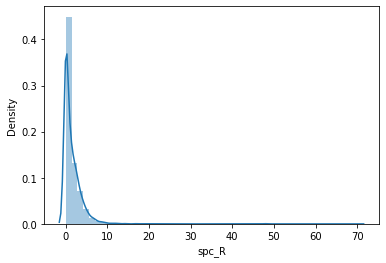

In [165]:
import seaborn as sns

sns.distplot( total_df['spc_R'] )

In [263]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\전국공중화장실표준데이터.xls'
toilet_df = pd.read_excel(path)

In [302]:
toilet_df.columns

use_cols = ['구분', '화장실명', '소재지도로명주소','위도', '경도']

In [303]:
toilet_df = toilet_df[ use_cols ]

In [304]:
toilet_df.columns = ['type', 'name', 'addr', 'lat', 'log']

In [305]:
toilet_df

,type,name,addr,lat,log
0,공중화장실,사량 읍덕마을,경상남도 통영시 사량면 하도일주로 254,34.824864,128.210852
1,공중화장실,수우도 공중화장실,경상남도 통영시 사량면 수우도길 2-49,34.833855,128.135655
2,공중화장실,미조마을 공중화장실,경상남도 통영시 산양읍 추도일주로 303-21,34.759355,128.288155
3,공중화장실,논아랫개 공중화장실,경상남도 통영시 산양읍 논아랫개길 168,34.782955,128.434055
4,공중화장실,능양,경상남도 통영시 사량면 능양길 44,34.808712,128.240621
...,...,...,...,...,...
32805,개방화장실,8단지남서울상가,경기도 과천시 부림로 16(부림동),37.435537,126.999218
32806,개방화장실,10단지종합상가,경기도 과천시 관문로 166(중앙동),37.434185,126.994735
32807,개방화장실,3단지병원상가,경기도 과천시 별양로 64(별양동),37.424443,126.993967
32808,개방화장실,과천타워,경기도 과천시 별양상가1로 10(별양동),37.426959,126.991996


In [306]:
toilet_df.isna().sum()

type       0
name       0
addr    5288
lat     2015
log     2017
dtype: int64

In [307]:
toilet_df = toilet_df.dropna().copy()

In [308]:
toilet_df['sido'] = toilet_df['addr'].apply( lambda x : x.split(' ')[0].replace('\"', '') )
toilet_df['gugun'] = toilet_df['addr'].apply( lambda x : x.split(' ')[1].replace('\"', '') )

In [309]:
toilet_df['sido'].unique()

array(['경상남도', '전라북도', '경상북도', '전라남도', '대구광역시', '세종특별자치시', '대전광역시',
       '부산광역시', '충청북도', '서울특별시', '강원도', '경기도', '울산광역시', '충청남도', '제주특별자치도',
       '광주광역시', '인천광역시'], dtype=object)

In [310]:
toilet_df.groupby(['sido', 'gugun']).min('lat')

lat         log
sido gugun                       
강원도  강릉시    37.608255  128.760615
     고성군    38.206658  128.359624
     동해시    37.463336  129.019331
     삼척시    36.880184  128.938049
     속초시    38.163129  128.518760
...               ...         ...
충청북도 제천시    37.055625  128.056201
     증평군    36.771498  127.565400
     진천군    36.751961  127.330001
     청주시    36.457013  127.333279
     충주시    36.824940  127.713131

[225 rows x 2 columns]

In [311]:
toilet_map = folium.Map([36, 127], zoom_start=7)

In [317]:
for idx in toilet_df.index:
    name = toilet_df.loc[idx, 'name']
    lat = toilet_df.loc[idx, 'lat']
    log = toilet_df.loc[idx, 'log']
    
    mk = folium.CircleMarker([lat, log], tooltip='{}'.format(name))
    mk.add_to(toilet_map)
    if idx >= 4000:
        break

In [318]:
toilet_map.save(r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\toilet_map.html')

In [294]:
print(toilet_df[toilet_df['sido'] == '강원도']['lat'].min())
print(toilet_df[toilet_df['sido'] == '강원도']['lat'].max())

36.880184
38.5389879612


In [298]:
toilet_df.groupby(['sido', 'gugun']).min('lat')
toilet_df.groupby(['sido', 'gugun']).max('lat')

lat         log
sido gugun                       
강원도  강릉시    37.911504  129.065617
     고성군    38.538988  128.579994
     동해시    37.597091  129.159334
     삼척시    37.475544  129.417037
     속초시    38.226777  128.610423
...               ...         ...
충청북도 제천시    37.923700  128.626700
     증평군    36.831248  127.632004
     진천군    37.004363  127.549444
     청주시    36.742029  127.752745
     충주시    37.132004  128.076221

[225 rows x 2 columns]

In [299]:
# 결측치 미리 처리
toilet_df = pd.read_excel(path, na_values='.')

In [ ]:
.sum(axis=1) # 행별로 합치기

# 시계열 데이터

In [319]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\미세먼지\일별평균대기오염도_2020.xlsx'
dust_df = pd.read_excel(path)

In [321]:
dust_df.columns = ['date', 'local', 'NO2', 'O3', 'CO2', 'SO2', 'dust', 'm_dust']

In [323]:
# 인덱스 파트

dust_df['local'].unique()

array(['강남구', '강동구', '강북구', '강서구', '공항대로', '관악구', '관악산', '광진구', '구로구',
       '금천구', '남산', '노원구', '도봉구', '동대문구', '동작구', '동작대로', '마포구', '북한산',
       '서대문구', '서울숲', '서초구', '성동구', '성북구', '세곡', '송파구', '시흥대로', '신촌로',
       '양천구', '영등포구', '영등포로', '올림픽공원', '용산구', '은평구', '자연사박물관', '정릉로',
       '종로', '종로구', '중구', '중랑구', '천호대로', '청계천로', '한강대로', '행주', '홍릉로',
       '화랑로', '강남대로', '강변북로', '도산대로', '마포아트센터', '궁동'], dtype=object)

In [326]:
dust_df2 = dust_df[ dust_df['local']=='강남구' ]

In [341]:
dust_df2.index = pd.to_datetime( dust_df2['date'].apply(str) )

In [343]:
# 데이터 값 파트
# 결측 데이터 체크

dust_df2.isna().sum()

date      0
local     0
NO2       0
O3        1
CO2       0
SO2       0
dust      0
m_dust    0
dtype: int64

In [344]:
# 데이터 타입 체크

dust_df2.dtypes

date        int64
local      object
NO2       float64
O3        float64
CO2       float64
SO2       float64
dust      float64
m_dust    float64
dtype: object

# 시계열 데이터 시 인덱스를 datatime으로 했을 때 장점

In [355]:
# 날짜를 이용해서 데이터 선택이 가능

dust_df2.loc['2020-01': '2020-03']

,date,local,NO2,O3,CO2,SO2,dust,m_dust
date,,,,,,,,
2020-01-01,20200101,강남구,0.037,0.003,0.7,0.003,30.0,22.0
2020-01-02,20200102,강남구,0.042,0.003,0.8,0.004,56.0,42.0
2020-01-03,20200103,강남구,0.041,0.010,0.8,0.004,61.0,46.0
2020-01-04,20200104,강남구,0.045,0.012,0.9,0.004,54.0,40.0
2020-01-05,20200105,강남구,0.045,0.008,0.9,0.004,45.0,34.0
...,...,...,...,...,...,...,...,...
2020-03-27,20200327,강남구,0.022,0.028,0.5,0.002,40.0,26.0
2020-03-28,20200328,강남구,0.010,0.035,0.3,0.002,29.0,8.0
2020-03-29,20200329,강남구,0.018,0.031,0.4,0.003,36.0,17.0


In [364]:
# resample - 특정 시간 간격으로 데이터를 집계해 볼 수 있음.
# q; 분기

dust_df2.resample('3m').mean()

,date,NO2,O3,CO2,SO2,dust,m_dust
date,,,,,,,
2020-01-31,2.020012e+07,0.035129,0.014097,0.683871,0.003129,39.000000,27.709677
2020-04-30,2.020032e+07,0.028830,0.028205,0.517045,0.002920,39.261364,24.397727
2020-07-31,2.020062e+07,0.020859,0.037725,0.429348,0.002413,28.152174,17.945652
2020-10-31,2.020092e+07,0.019348,0.023576,0.409783,0.002935,23.902174,15.521739
2021-01-31,2.020117e+07,0.030705,0.014689,0.581967,0.003672,36.295082,25.573770


In [ ]:
# 시각화

0   금
1   월
2   화
3   수

In [365]:
def get_dustDf( path, local):
    dust_df = pd.read_excel(path)
    dust_df.columns = ['date', 'local', 'NO2', 'O3', 'CO2', 'SO2', 'dust', 'm_dust']
    dust_df2 = dust_df[ dust_df['local']==local ]
    dust_df2.index = pd.to_datetime( dust_df2['date'].apply(str) )
    return dust_df2

In [367]:
p = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\미세먼지\일별평균대기오염도_2010.xlsx'

dust_2010 = get_dustDf(p, '마포구')

p = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\미세먼지\일별평균대기오염도_2011.xlsx'

dust_2011 = get_dustDf(p, '마포구')

# 데이터 합치기 - concat
- 밑으로 이어서 붙이기
- 한 번에 여러개를 동시에 붙일 수 있다.

In [368]:
pd.concat( [dust_2010, dust_2011] )

,date,local,NO2,O3,CO2,SO2,dust,m_dust
date,,,,,,,,
2010-01-01,20100101,마포구,0.036,0.004,0.6,0.006,34.0,NaN
2010-01-02,20100102,마포구,0.035,0.005,0.7,0.006,54.0,NaN
2010-01-03,20100103,마포구,0.033,0.010,0.7,0.006,51.0,NaN
2010-01-04,20100104,마포구,0.036,0.007,0.7,0.004,42.0,NaN
2010-01-05,20100105,마포구,0.029,0.012,0.6,0.005,54.0,NaN
...,...,...,...,...,...,...,...,...
2011-12-27,20111227,마포구,0.055,0.003,0.9,0.005,59.0,NaN
2011-12-28,20111228,마포구,0.085,0.002,1.4,0.007,78.0,NaN
2011-12-29,20111229,마포구,0.048,0.005,1.1,0.010,106.0,NaN


In [378]:
# 2010 ~ 2020년도 데이터를 모두 하나로 붙여보자!

df_list = []

for y in range(2010, 2021):
    p = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\미세먼지\일별평균대기오염도_{}.xlsx'.format(y)
    dust_temp = get_dustDf(p, '마포구')
    df_list.append(dust_temp)

In [379]:
df_list

[                date local    NO2     O3  CO2    SO2  dust  m_dust
 date                                                              
 2010-01-01  20100101   마포구  0.036  0.004  0.6  0.006  34.0     NaN
 2010-01-02  20100102   마포구  0.035  0.005  0.7  0.006  54.0     NaN
 2010-01-03  20100103   마포구  0.033  0.010  0.7  0.006  51.0     NaN
 2010-01-04  20100104   마포구  0.036  0.007  0.7  0.004  42.0     NaN
 2010-01-05  20100105   마포구  0.029  0.012  0.6  0.005  54.0     NaN
 ...              ...   ...    ...    ...  ...    ...   ...     ...
 2010-12-27  20101227   마포구  0.052  0.004  1.1  0.005  62.0     NaN
 2010-12-28  20101228   마포구  0.042  0.005  0.9  0.005  65.0     NaN
 2010-12-29  20101229   마포구  0.039  0.007  0.6  0.006  41.0     NaN
 2010-12-30  20101230   마포구  0.036  0.007  0.6  0.006  45.0     NaN
 2010-12-31  20101231   마포구  0.028  0.010  0.6  0.008  45.0     NaN
 
 [365 rows x 8 columns],
                 date local    NO2     O3  CO2    SO2   dust  m_dust
 date               

In [380]:
pd.concat( df_list )

,date,local,NO2,O3,CO2,SO2,dust,m_dust
date,,,,,,,,
2010-01-01,20100101,마포구,0.036,0.004,0.6,0.006,34.0,NaN
2010-01-02,20100102,마포구,0.035,0.005,0.7,0.006,54.0,NaN
2010-01-03,20100103,마포구,0.033,0.010,0.7,0.006,51.0,NaN
2010-01-04,20100104,마포구,0.036,0.007,0.7,0.004,42.0,NaN
2010-01-05,20100105,마포구,0.029,0.012,0.6,0.005,54.0,NaN
...,...,...,...,...,...,...,...,...
2020-12-27,20201227,마포구,0.049,0.010,0.8,0.004,55.0,40.0
2020-12-28,20201228,마포구,0.058,0.006,0.8,0.004,47.0,39.0
2020-12-29,20201229,마포구,0.038,0.009,0.8,0.003,61.0,50.0


#  아파트 실거래 가격1년치 데이터 가져와서 학원 현황 정리  (붙이기는 내일)

In [399]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\부동산 데이터 실습\아파트 실거래가 2021\202101_실거래가.xlsx'
apt_df = pd.read_excel(path, index_col=0)

In [400]:
apt_df.columns

use_col = ['시도', '구군', '거래금액', '건축년도', '법정동', '아파트', '년', '월', '일', '전용면적']
apt_df2 = apt_df[ use_col ]

In [404]:
apt_df2.columns = ['sido', 'gugun', 'price', 'arch_year', 'dong', 'name', 'year', 'month', 'day', 'area']

In [405]:
apt_df2

,sido,gugun,price,arch_year,dong,name,year,month,day,area
0,서울특별시,종로구,"130,000",2000,청운동,청운현대,2021,1,14,129.76
1,서울특별시,종로구,"150,000",2008,사직동,광화문스페이스본(106동),2021,1,7,144.52
2,서울특별시,종로구,"175,000",2004,내수동,경희궁의아침2단지,2021,1,15,174.55
3,서울특별시,종로구,"175,000",2004,내수동,경희궁의아침2단지,2021,1,15,174.55
4,서울특별시,종로구,"180,000",2004,내수동,경희궁의아침3단지,2021,1,17,123.13
...,...,...,...,...,...,...,...,...,...,...
62599,세종특별자치시,세종특별자치시,"8,500",1992,전의면 동교리,재동,2021,1,14,59.87
62600,세종특별자치시,세종특별자치시,"7,350",2001,전의면 유천리,민석그린,2021,1,4,59.94
62601,세종특별자치시,세종특별자치시,"8,500",2001,전의면 유천리,민석그린,2021,1,21,59.94
62602,세종특별자치시,세종특별자치시,"5,200",1996,소정면 운당리,무궁화,2021,1,20,59.40


In [406]:
apt_df2.isna().sum()

sido         0
gugun        0
price        0
arch_year    0
dong         0
name         0
year         0
month        0
day          0
area         0
dtype: int64

In [407]:
apt_df2.dtypes

sido          object
gugun         object
price         object
arch_year      int64
dong          object
name          object
year           int64
month          int64
day            int64
area         float64
dtype: object

In [408]:
apt_df2['price'].apply('')

0        130,000
1        150,000
2        175,000
3        175,000
4        180,000
          ...   
62599      8,500
62600      7,350
62601      8,500
62602      5,200
62603      5,000
Name: price, Length: 62604, dtype: object

In [409]:
df_list = []

for year in range(2020, 2022):
    for month in range(1, 13):
        date = str(year) + str(month).zfill(2)
        path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\부동산 데이터 실습\아파트 실거래가 {}\{}_실거래가.xlsx'
        temp_df = pd.read_excel(path.format(year, date), index_col=0)
        df_list.append(temp_df)

In [410]:
pd.concat(df_list, ignore_index=True)

,시도,구군,거래금액,거래유형,건축년도,법정동,아파트,년,월,일,전용면적,중개사소재지,지번,층
0,서울특별시,종로구,"100,000",NaN,2007,필운동,신동아블루아광화문의꿈,2020,1,3,111.97,NaN,254,6
1,서울특별시,종로구,"162,000",NaN,2008,사직동,광화문스페이스본(106동),2020,1,2,163.33,NaN,9-1,2
2,서울특별시,종로구,"88,000",NaN,1994,내수동,세종로대우,2020,1,6,109.91,NaN,167,11
3,서울특별시,종로구,"130,000",NaN,2004,내수동,킹스매너,2020,1,9,194.43,NaN,110-15,4
4,서울특별시,종로구,"149,000",NaN,2003,내수동,경희궁파크팰리스,2020,1,20,148.09,NaN,95,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25323,세종특별자치시,세종특별자치시,"6,400",직거래,1992,전의면 동교리,재동,2021,12,18,59.87,NaN,197-16,5
25324,세종특별자치시,세종특별자치시,"6,200",중개거래,2001,전의면 유천리,민석그린,2021,12,11,45.57,세종시,528,5
25325,세종특별자치시,세종특별자치시,"7,000",중개거래,2001,전의면 유천리,민석그린,2021,12,14,59.94,세종시,528,1
25326,세종특별자치시,세종특별자치시,"6,500",직거래,1996,소정면 운당리,무궁화,2021,12,13,59.40,NaN,35-1,7


## 학원데이터

In [421]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\부동산 데이터 실습\사설학원 현황_시도별_행정구별(2013-2021).xlsx'
pd.read_excel(path)

,* 사설학원 종류 및 분야구분,Unnamed: 1,Unnamed: 2
0,종류,구 분,정 의
1,학교교과교습학원\n : ｢유아교육법｣ 제2조 제1호에 따른 유아 또는 ｢장애인 등에...,입시검정 및 보습,초등학교･중학교･고등학교의 교육과정에 속하는 교과로서 예ㆍ체능계 및 실업계 고등학교...
2,NaN,국제화,보통교과에 속하지 않는 교과로서 유아 또는 초등학교･중학교･고등학교 학생을 주된 교...
3,NaN,예능,"음악, 미술, 무용"
4,NaN,특수교육,특수학교 교육과정에 속하는 교과 및 치료교육 활동
5,NaN,종합,구분이 2개 이상 해당되는 학원
6,NaN,기타,유아교육법 제2조 제1호에 해당하는 교습대상으로 교습을 하거나 같은 호에 해당하는 ...
7,평생직업교육학원\n : 학교교과교습학원에 따른 학원 외에 평생교육이나 직업교육을 목...,국제화,"성인대상 어학, 통역, 번역"
8,NaN,직업기술,"산업기반기술, 산업응용기술, 산업서비스, 일반서비스, 컴퓨터, 문화관광, 간호보조기..."
9,NaN,인문사회,"대학편입, 행정, 경영, 회계, 통계, 성인고시"


In [416]:
academy_df

,Unnamed: 0,국제화,보통교과에 속하지 않는 교과로서 유아 또는 초등학교･중학교･고등학교 학생을 주된 교습대상으로 하는 실용외국어
0,NaN,예능,"음악, 미술, 무용"
1,NaN,특수교육,특수학교 교육과정에 속하는 교과 및 치료교육 활동
2,NaN,종합,구분이 2개 이상 해당되는 학원
3,NaN,기타,유아교육법 제2조 제1호에 해당하는 교습대상으로 교습을 하거나 같은 호에 해당하는 ...
4,평생직업교육학원\n : 학교교과교습학원에 따른 학원 외에 평생교육이나 직업교육을 목...,국제화,"성인대상 어학, 통역, 번역"
5,NaN,직업기술,"산업기반기술, 산업응용기술, 산업서비스, 일반서비스, 컴퓨터, 문화관광, 간호보조기..."
6,NaN,인문사회,"대학편입, 행정, 경영, 회계, 통계, 성인고시"
7,NaN,기예,"국악, 전통무용, 서예, 꽃꽂이, 꽃기예, 만화, 연극, 모델, 화술, 마술(매직)..."
8,NaN,종합,구분이 2개 이상 해당되는 학원
